In [ ]:
!pip install scikit-elm
from skelm import ELMRegressor

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

import time
import re

from sklearn import preprocessing
from sklearn import decomposition
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
cd 'drive/MyDrive/Artigo_Farmacos/'


/content/drive/MyDrive/Artigo_Farmacos


In [ ]:
ls

analise.ipynb         database20220315.gsheet  Neq0570.xlsx  predicao_solubilidade.ipynb
database20220315.csv  Neq0570.csv              pkl/


In [ ]:
basename = 'farmacos'
dados = pd.read_csv('database20220315.csv',sep=',',encoding='ISO-8859-1')

In [ ]:
dados

,ID,Name,Solubility,SMILES Canonical,Smiles (Optimized Geometry),Energy,Smiles,SlogP,TPSA,ExactMW,...,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,FractionCSP3
0,A-4,Benzo[cd]indol-2(1H)-one,-3.254767,O=C1Nc2cccc3cccc1c23,O=C1Nc2cccc3cccc1c23,42.419055,O=c1[nH]c2cccc3cccc1c23,2.40550,29.10,169.052764,...,2,0,1,0,0,1,2,0,0,0.000000
1,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,-4.662065,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,70.253834,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,2.48540,56.60,422.220557,...,2,4,4,0,4,4,2,0,0,0.520000
2,A-10,vinyltoluene,-3.123150,C=Cc1cccc(C)c1,C=Cc1cccc(C)c1,16.377493,C=Cc1cccc(C)c1,2.63802,0.00,118.078250,...,1,0,0,0,0,0,1,0,0,0.111111
3,A-11,3-(3-ethylcyclopentyl)propanoic acid,-3.286116,CCC1CCC(CCC(=O)[O-])C1,CCC1CCC(CCC(=O)[O-])C1,13.452523,CCC1CCC(CCC(=O)[O-])C1,1.34280,40.13,169.123403,...,0,1,1,0,0,0,0,1,1,0.900000
4,A-12,"11,16,17,21-tetrahydroxypregna-1,4-diene-3,20-...",-2.664549,CC12C=CC(=O)C=C1CCC1C2C(O)CC2(C)C1CC(O)C2(O)C(...,CC12C=CC(=O)C=C1CCC1C2C(O)CC2(C)C1CC(O)C2(O)C(...,95.736649,CC12C=CC(=O)C=C1CCC1C2C(O)CC2(C)C1CC(O)C2(O)C(...,0.52840,115.06,376.188589,...,0,3,4,0,0,0,0,3,4,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393,A-5125,diammonium 2-[(carboxylatomethyl)disulfanyl]ac...,0.459603,O=C([O-])CSSCC(=O)[O-],O=C([O-])CSSCC(=O)[O-],107.905054,O=C([O-])CSSCC(=O)[O-],-2.13240,80.26,179.956198,...,0,0,0,0,0,0,0,0,0,0.500000
8394,A-5279,ammonium 4-(acetoacetylamino)-5-methoxy-2-meth...,-0.201876,COc1cc(S(=O)(=O)[O-])c(C)cc1NC(=O)CC(C)=O,COc1cc(S(=O)(=O)[O-])c(C)cc1NC(=O)CC(C)=O,18.558162,COc1cc(S(=O)(=O)[O-])c(C)cc1NC(=O)CC(=O)C,0.82532,112.60,300.054732,...,1,0,0,0,0,0,1,0,0,0.333333
8395,B-2669,fosamine ammonium salt,0.769300,CCOP(=O)([O-])C(N)=O,CCOP(=O)([O-])C(N)=O,67.845037,CCOP(=O)([O-])C(=O)N,-0.34500,92.45,152.011818,...,0,0,0,0,0,0,0,0,0,0.666667
8396,B-3236,glufosinate-ammonium,0.839700,CP(=O)([O-])CCC([NH3+])C(=O)[O-],CP(=O)([O-])CCC([NH3+])C(=O)[O-],-120.299404,CP(=O)([O-])CCC([NH3+])C(=O)[O-],-2.99490,107.90,180.043118,...,0,0,0,0,0,0,0,0,0,0.800000


In [ ]:
dados = dados.drop_duplicates()

In [ ]:
dados = dados.drop(['ID','Name','SMILES Canonical','Smiles (Optimized Geometry)','Smiles', 'Solubility'],axis=1)

In [ ]:
dados

,Energy,SlogP,TPSA,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumAmideBonds,...,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,FractionCSP3
0,42.419055,2.40550,29.10,169.052764,2,1,0,1,1,1,...,2,0,1,0,0,1,2,0,0,0.000000
1,70.253834,2.48540,56.60,422.220557,6,0,12,0,6,0,...,2,4,4,0,4,4,2,0,0,0.520000
2,16.377493,2.63802,0.00,118.078250,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.111111
3,13.452523,1.34280,40.13,169.123403,2,0,4,0,2,0,...,0,1,1,0,0,0,0,1,1,0.900000
4,95.736649,0.52840,115.06,376.188589,6,4,2,4,6,0,...,0,3,4,0,0,0,0,3,4,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8391,12.317820,3.05370,0.00,281.854110,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0.000000
8393,107.905054,-2.13240,80.26,179.956198,4,0,5,0,6,0,...,0,0,0,0,0,0,0,0,0,0.500000
8394,18.558162,0.82532,112.60,300.054732,7,1,5,1,6,1,...,1,0,0,0,0,0,1,0,0,0.333333
8395,67.845037,-0.34500,92.45,152.011818,5,2,3,1,4,1,...,0,0,0,0,0,0,0,0,0,0.666667


In [ ]:
import matplotlib.pyplot as plt

<ipython-input-11-19a42213678f>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


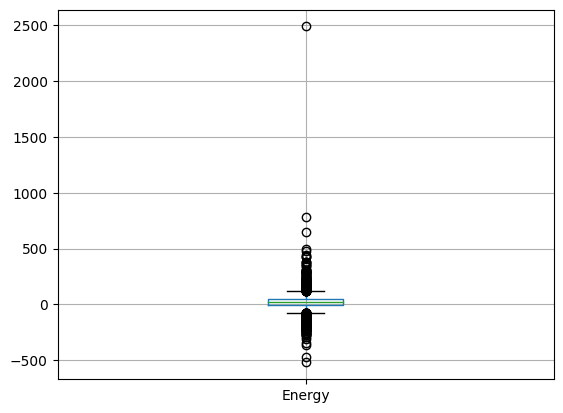

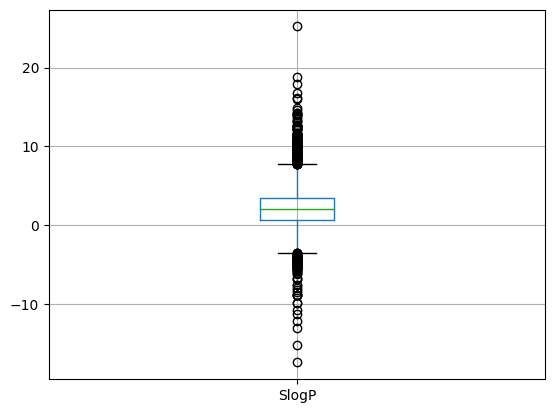

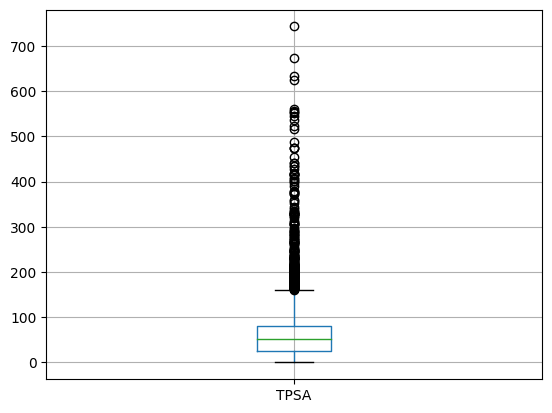

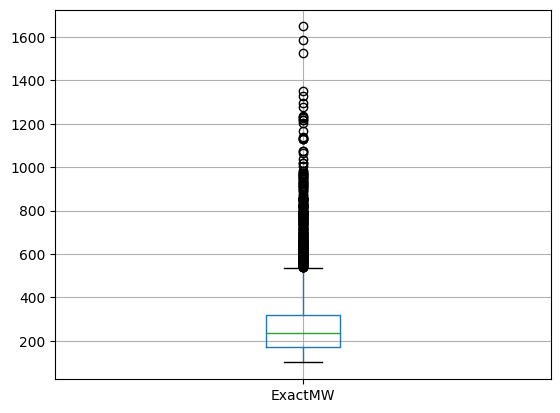

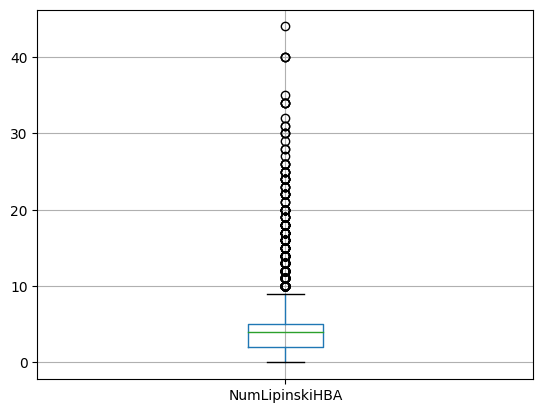

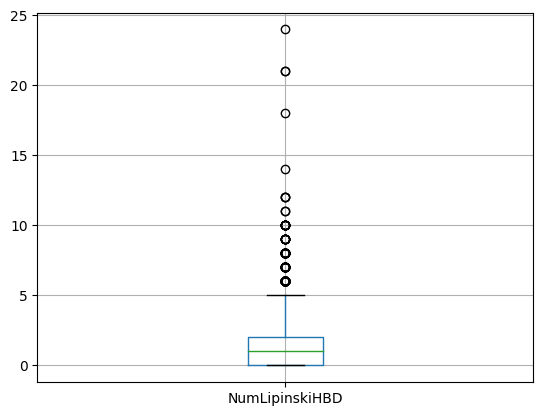

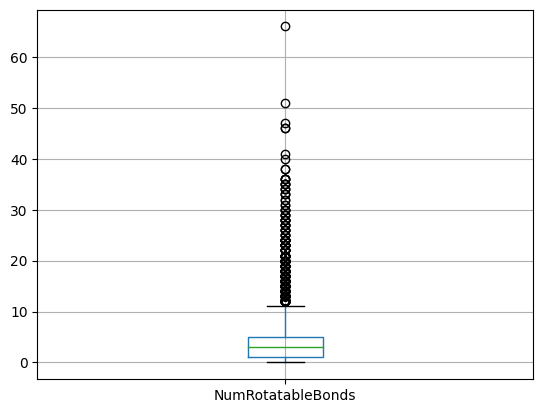

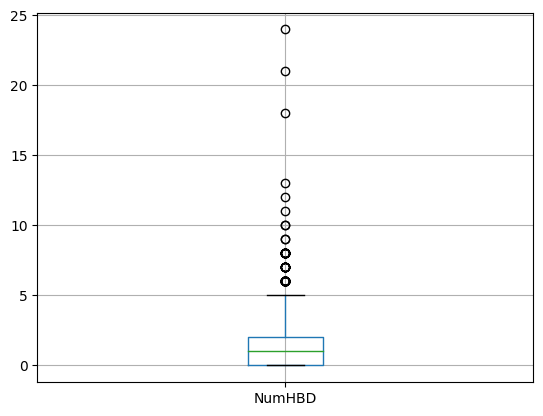

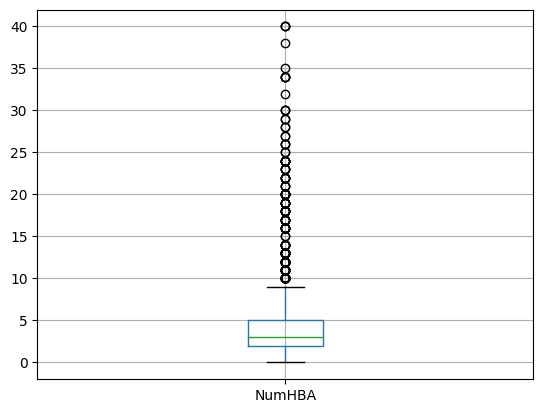

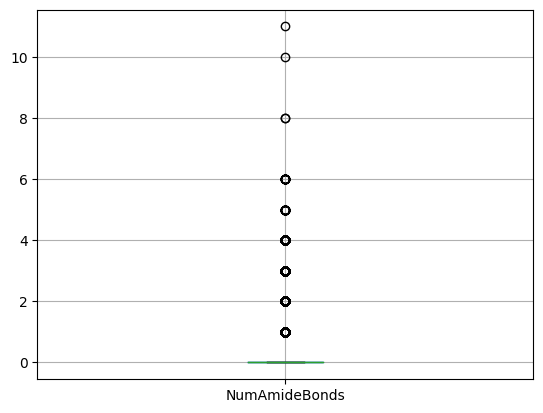

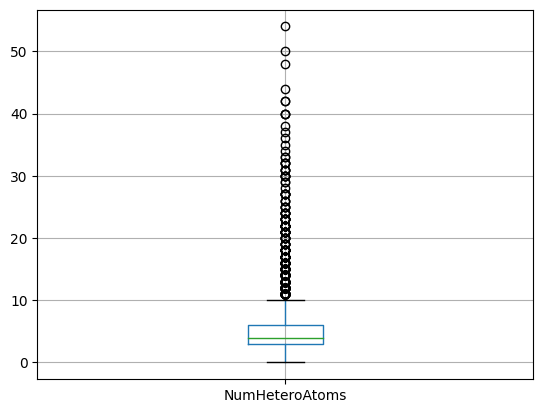

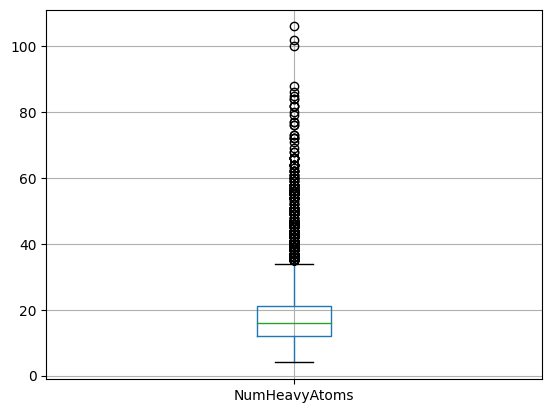

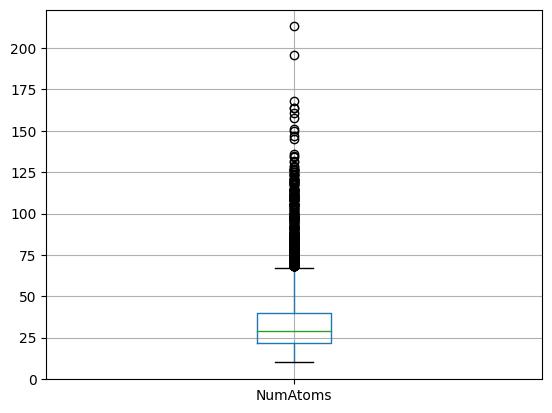

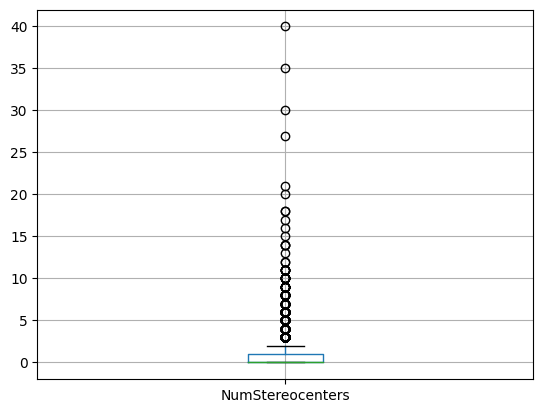

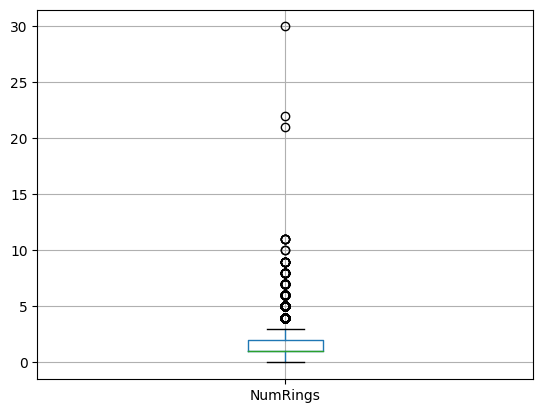

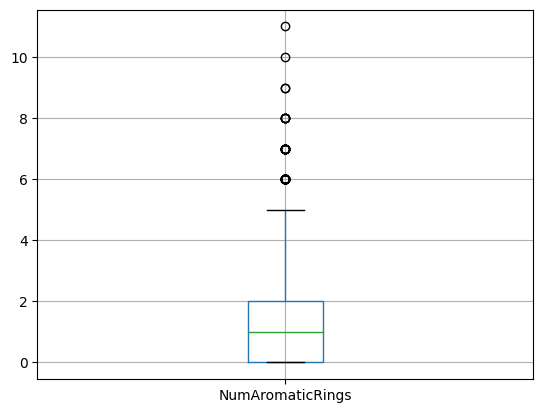

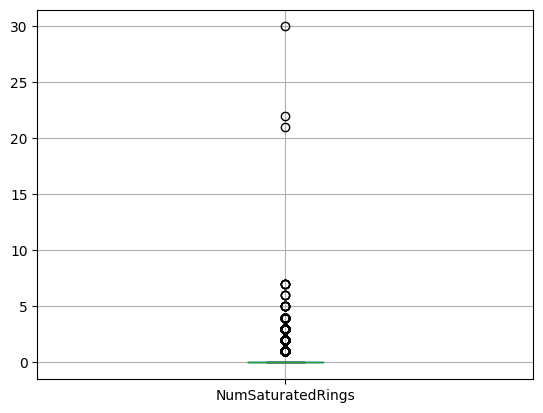

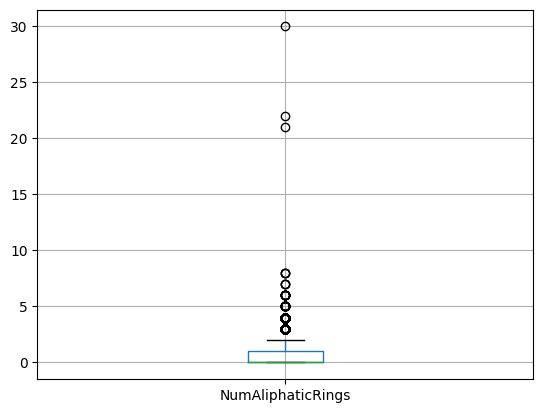

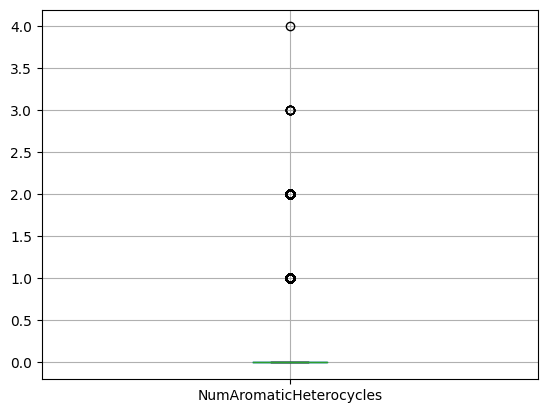

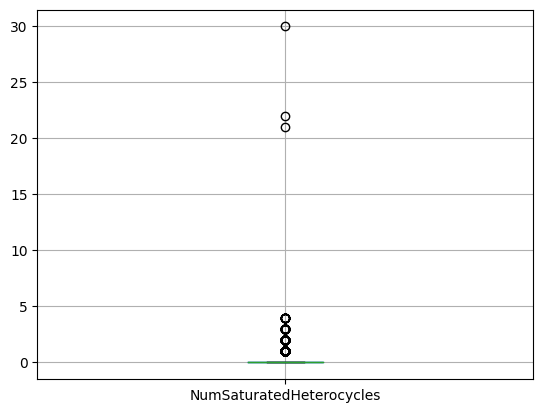

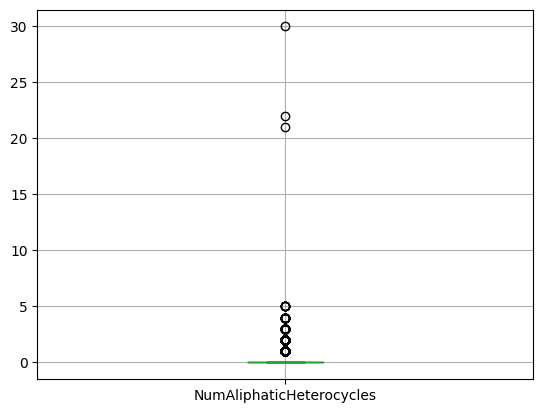

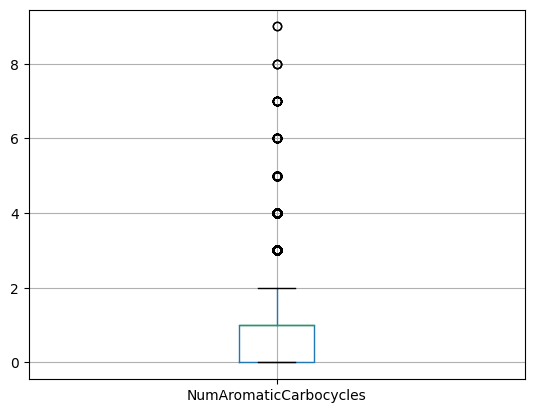

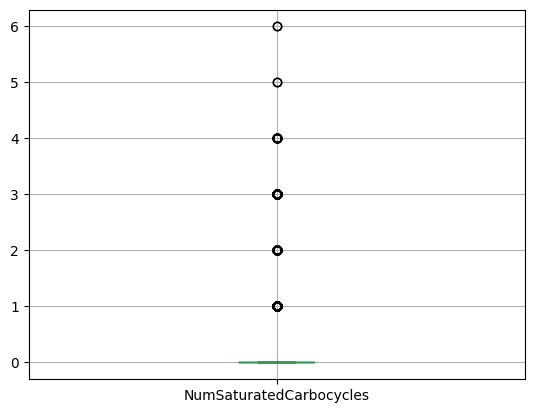

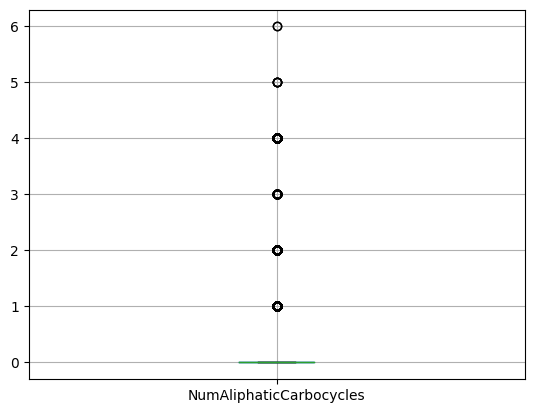

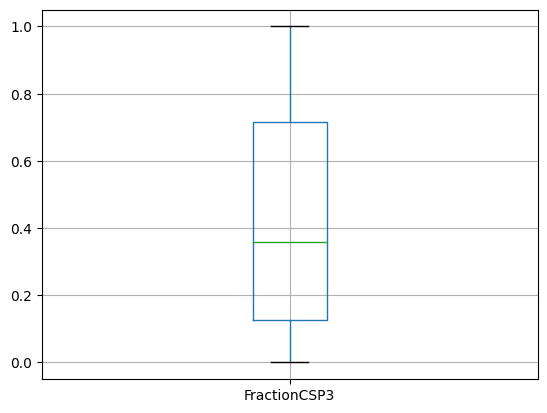

In [ ]:
for i in dados.columns:
  plt.figure()
  dados.boxplot(column=i)

In [ ]:
primeiro_quartil = dados.quantile(q=0.25, axis=0, numeric_only=True)
terceiro_quartil = dados.quantile(q=0.75, axis=0, numeric_only=True)

In [ ]:
menor = primeiro_quartil - (terceiro_quartil - primeiro_quartil)*1.5
maior = terceiro_quartil + (terceiro_quartil - primeiro_quartil)*1.5

In [ ]:
menor

Energy                     -77.588870
SlogP                       -3.532188
TPSA                       -54.640000
ExactMW                    -46.588247
NumLipinskiHBA              -2.500000
NumLipinskiHBD              -3.000000
NumRotatableBonds           -5.000000
NumHBD                      -3.000000
NumHBA                      -2.500000
NumAmideBonds                0.000000
NumHeteroAtoms              -1.500000
NumHeavyAtoms               -1.500000
NumAtoms                    -5.000000
NumStereocenters            -1.500000
NumRings                    -0.500000
NumAromaticRings            -3.000000
NumSaturatedRings            0.000000
NumAliphaticRings           -1.500000
NumAromaticHeterocycles      0.000000
NumSaturatedHeterocycles     0.000000
NumAliphaticHeterocycles     0.000000
NumAromaticCarbocycles      -1.500000
NumSaturatedCarbocycles      0.000000
NumAliphaticCarbocycles      0.000000
FractionCSP3                -0.758929
dtype: float64

In [ ]:
for i in dados.columns:
  dados = dados.drop(dados[dados[i] < menor[i]].index.values,axis=0)

In [ ]:
for i in dados.columns:
  dados = dados.drop(dados[dados[i] > maior[i]].index.values,axis=0)

In [ ]:
dados

,Energy,SlogP,TPSA,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumAmideBonds,...,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,FractionCSP3
2,16.377493,2.63802,0.00,118.078250,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.111111
5,41.295696,3.19580,17.07,218.054321,1,0,2,0,1,0,...,2,0,0,0,0,0,2,0,0,0.000000
6,11.592227,3.49720,61.83,342.146724,5,0,10,0,5,0,...,2,0,0,0,0,0,2,0,0,0.300000
7,25.056975,1.56510,20.31,149.084064,2,0,2,0,2,0,...,1,0,0,0,0,0,1,0,0,0.222222
8,15.501683,2.57080,26.30,192.115030,2,0,3,0,2,0,...,1,0,0,0,0,0,1,0,0,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,11.431589,2.94460,0.00,237.904626,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0.000000
8389,-36.386986,4.49410,27.69,411.835355,3,0,4,0,4,0,...,1,0,0,0,0,0,1,0,0,0.250000
8390,12.339983,2.94460,0.00,237.904626,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0.000000
8391,12.317820,3.05370,0.00,281.854110,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0.000000


In [ ]:
y = dados['SlogP']
X = dados.drop(columns = ['SlogP'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size =0.20, random_state=1)

In [ ]:
X_train['SlogP'] = y_train
X_val['SlogP'] = y_val

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler =MinMaxScaler()

In [ ]:
dados_minmax = scaler.fit_transform(X_train)

In [ ]:
train1 = scaler.inverse_transform(train)

In [ ]:
scaler.inverse_transform()

ValueError: Expected 2D array, got 1D array instead:
array=[0.37201713 0.46360975 0.41914242 ... 0.48234444 0.34611794 0.46540439].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df_train1 = pd.DataFrame(train1,columns=train.columns)

In [ ]:
df_train1[df_train]

,Energy,TPSA,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumAmideBonds,NumHeteroAtoms,...,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,FractionCSP3,SlogP
0,3.765081,107.54,104.033425,6.0,4.0,1.0,2.0,2.0,0.0,6.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,-1.54850
1,46.351099,29.46,174.161980,2.0,1.0,9.0,1.0,2.0,0.0,2.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.000000,2.35580
2,71.515612,61.72,197.105193,4.0,3.0,5.0,3.0,4.0,0.0,4.0,...,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.400000,0.46030
3,116.834072,66.20,214.050967,4.0,0.0,2.0,0.0,3.0,0.0,4.0,...,0.0,0.0,0.00,0.0,0.0,2.0,0.0,0.0,0.000000,2.33540
4,104.862029,49.20,342.169985,5.0,1.0,2.0,1.0,4.0,0.0,5.0,...,1.0,4.0,0.00,1.0,2.0,1.0,0.0,2.0,0.550000,0.65480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,96.174778,0.00,260.100129,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.00,0.0,0.0,4.0,0.0,0.0,0.052632,5.59372
6714,91.677289,94.26,401.103000,6.0,3.0,2.0,3.0,5.0,0.0,7.0,...,1.0,2.0,0.00,1.0,2.0,2.0,0.0,0.0,0.285714,1.09830
6715,43.832295,26.30,198.161980,2.0,0.0,1.0,0.0,2.0,0.0,2.0,...,1.0,1.0,0.00,0.0,0.0,0.0,1.0,1.0,0.916667,3.15440
6716,227.779663,214.65,439.125128,13.0,5.0,9.0,4.0,11.0,2.0,13.0,...,0.0,1.0,0.75,0.0,1.0,1.0,0.0,0.0,0.210526,-2.65250


In [ ]:
train

,Energy,TPSA,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumAmideBonds,NumHeteroAtoms,...,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,FractionCSP3,SlogP
0,0.161733,0.144788,0.002600,0.136364,0.166667,0.015152,0.083333,0.050,0.000000,0.111111,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.372017
1,0.176097,0.039664,0.047906,0.045455,0.041667,0.136364,0.041667,0.050,0.000000,0.037037,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.463610
2,0.184585,0.083098,0.062729,0.090909,0.125000,0.075758,0.125000,0.100,0.000000,0.074074,...,0.000000,0.000000,0.00,0.000000,0.000000,0.111111,0.000000,0.000000,0.400000,0.419142
3,0.199871,0.089129,0.073677,0.090909,0.000000,0.030303,0.000000,0.075,0.000000,0.074074,...,0.000000,0.000000,0.00,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.463131
4,0.195833,0.066241,0.156448,0.113636,0.041667,0.030303,0.041667,0.100,0.000000,0.092593,...,0.033333,0.133333,0.00,0.033333,0.066667,0.111111,0.000000,0.333333,0.550000,0.423705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,0.192902,0.000000,0.103427,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.018519,...,0.000000,0.000000,0.00,0.000000,0.000000,0.444444,0.000000,0.000000,0.052632,0.539569
6714,0.191385,0.126908,0.194522,0.136364,0.125000,0.030303,0.125000,0.125,0.000000,0.129630,...,0.033333,0.066667,0.00,0.033333,0.066667,0.222222,0.000000,0.000000,0.285714,0.434110
6715,0.175247,0.035409,0.063411,0.045455,0.000000,0.015152,0.000000,0.050,0.000000,0.037037,...,0.033333,0.033333,0.00,0.000000,0.000000,0.000000,0.166667,0.166667,0.916667,0.482344
6716,0.237292,0.288997,0.219086,0.295455,0.208333,0.136364,0.166667,0.275,0.181818,0.240741,...,0.000000,0.033333,0.25,0.000000,0.033333,0.111111,0.000000,0.000000,0.210526,0.346118


In [ ]:
dados_novo = pd.DataFrame(dados_minmax, columns=dados.columns )

In [ ]:
dados_novo

,Energy,SlogP,TPSA,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumAmideBonds,...,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,FractionCSP3
0,0.187000,0.464776,0.039179,0.044605,0.045455,0.041667,0.000000,0.041667,0.025,0.090909,...,0.181818,0.000000,0.033333,0.00,0.000000,0.033333,0.222222,0.000000,0.000000,0.000000
1,0.196250,0.466650,0.076204,0.208165,0.136364,0.000000,0.181818,0.000000,0.150,0.000000,...,0.181818,0.133333,0.133333,0.00,0.133333,0.133333,0.222222,0.000000,0.000000,0.520000
2,0.178347,0.470230,0.000000,0.011673,0.000000,0.000000,0.015152,0.000000,0.000,0.000000,...,0.090909,0.000000,0.000000,0.00,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111
3,0.177375,0.439845,0.054030,0.044651,0.045455,0.000000,0.060606,0.000000,0.050,0.000000,...,0.000000,0.033333,0.033333,0.00,0.000000,0.000000,0.000000,0.166667,0.166667,0.900000
4,0.204718,0.420740,0.154913,0.178426,0.136364,0.166667,0.030303,0.166667,0.150,0.000000,...,0.000000,0.100000,0.133333,0.00,0.000000,0.000000,0.000000,0.500000,0.666667,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393,0.208761,0.358319,0.108059,0.051650,0.090909,0.000000,0.075758,0.000000,0.150,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
8394,0.179071,0.427706,0.151601,0.129239,0.159091,0.041667,0.075758,0.041667,0.150,0.090909,...,0.090909,0.000000,0.000000,0.00,0.000000,0.000000,0.111111,0.000000,0.000000,0.333333
8395,0.195449,0.400251,0.124472,0.033596,0.113636,0.083333,0.045455,0.041667,0.100,0.090909,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
8396,0.132929,0.338085,0.145273,0.051706,0.113636,0.125000,0.060606,0.041667,0.100,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000


In [ ]:
dados[dados['ID']=='B-216']

,ID,Name,Solubility,SMILES Canonical,Smiles (Optimized Geometry),Energy,Smiles,SlogP,TPSA,ExactMW,...,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,FractionCSP3
2046,B-216,phenolphthalein,-2.9008,O=C1OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc21,O=C1OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc21,39.420417,O=C1OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc12,3.5601,66.76,318.089209,...,3,0,1,0,0,1,3,0,0,0.05


In [ ]:
X1.columns

Index(['Energy', 'TPSA', 'ExactMW', 'NumLipinskiHBA', 'NumLipinskiHBD',
       'NumRotatableBonds', 'NumHBD', 'NumHBA', 'NumAmideBonds',
       'NumHeteroAtoms', 'NumHeavyAtoms', 'NumAtoms', 'NumStereocenters',
       'NumRings', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles',
       'NumAromaticCarbocycles', 'NumSaturatedCarbocycles',
       'NumAliphaticCarbocycles', 'FractionCSP3'],
      dtype='object')

In [ ]:
basename1 = 'farmacos_pred'
dados1 = pd.read_csv('Neq0570.csv',sep=',',encoding='ISO-8859-1')


yv = dados1['SlogP']
Xv = dados1.drop(columns = ['ID','Smiles','SlogP'])

In [ ]:
df_train1.to_csv('train_novo3.csv',index=False)


In [ ]:
train = pd.read_csv('train_novo3.csv')
X = train.drop(['SlogP'],axis=1)
y = train['SlogP']

In [ ]:
Xt = X[X.index==1537]

In [ ]:
Xt = pd.concat([Xt,X[X.index==4690],X[X.index==5247],X[X.index==187],X[X.index==5050],X[X.index==46],X[X.index==5641],X[X.index==1117],X[X.index==3072]],axis=0)

In [ ]:
yt = y[y.index==1537]

In [ ]:
yt = pd.concat([yt,y[y.index==4690],y[y.index==5247],y[y.index==187],y[y.index==5050],y[y.index==46],y[y.index==5641],y[y.index==1117],y[y.index==3072]],axis=0)

In [ ]:
Xt = pd.concat([Xt,X[X.index==5397],X[X.index==1374],X[X.index==5764],X[X.index==2117],X[X.index==1651],X[X.index==2437],X[X.index==6373],X[X.index==4229],X[X.index==3392],X[X.index==3072],X[X.index==432],X[X.index==896]],axis=0)

In [ ]:
yt = pd.concat([yt,y[y.index==5397],y[y.index==1374],y[y.index==5764],y[y.index==2117],y[y.index==1651],y[y.index==2437],y[y.index==6373],y[y.index==4229],y[y.index==3392],y[y.index==3072],y[y.index==432],y[y.index==896]],axis=0)

In [ ]:
X=X.drop([1537,4690,5247,187,5050,46,5641,1117,3072,5397,1374,5764,2117,1651,2437,6373,4229,3392,3070,432,896],axis=0)

In [ ]:
y=y.drop([1537,4690,5247,187,5050,46,5641,1117,3072,5397,1374,5764,2117,1651,2437,6373,4229,3392,3070,432,896],axis=0)

In [ ]:
Xt.shape

(21, 24)

In [ ]:
X

,Energy,TPSA,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumAmideBonds,NumHeteroAtoms,...,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,FractionCSP3
0,"3,76508142349124","107,54","104,033425368",6,4,"0,999999999999997",2,2,0,6,...,0,0,0,0,0,0,0,0,0,0
1,"46,3510988454587","29,46","174,161979944",2,"0,999999999999998",9,"0,999999999999998",2,0,2,...,0,0,0,0,0,0,0,0,0,1
2,"71,5156124525609","61,7199999999999","197,10519334",4,3,5,3,4,0,4,...,1,0,0,0,0,0,1,0,0,"0,4"
3,"116,83407212608","66,2","214,05096669591",4,0,2,0,3,0,4,...,2,0,0,0,0,0,2,0,0,0
4,"104,862028524912","49,2","342,16998466809",5,"0,999999999999998",2,"0,999999999999998",4,0,5,...,1,"0,999999999999999",4,0,"0,999999999999999",2,1,0,2,"0,55"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,"96,1747784302175",0,"260,100128636",0,0,0,0,0,0,"0,999999999999999",...,4,0,0,0,0,0,4,0,0,"0,0526315789473684"
6714,"91,6772890468166","94,26","401,10300042",6,3,2,3,5,0,7,...,2,"0,999999999999999",2,0,"0,999999999999999",2,2,0,0,"0,285714285714286"
6715,"43,8322951399596","26,3","198,161979944",2,0,"0,999999999999997",0,2,0,2,...,0,"0,999999999999999","0,999999999999999",0,0,0,0,1,1,"0,916666666666667"
6716,"227,779662777442","214,65","439,12512842382",13,5,9,4,11,2,13,...,2,0,"0,999999999999999","0,75",0,"0,999999999999999",1,0,0,"0,210526315789474"


In [ ]:
y[y.index==5397]

5397    2.1218
Name: SlogP, dtype: float64

In [ ]:

d= pd.concat([X[X.index==5397],X[X.index==1374],X[X.index==5764],X[X.index==4229],X[X.index==2437],X[X.index==6373],X[X.index==3392],X[X.index==3070],X[X.index==2634]],axis=0)

In [ ]:
d1= pd.concat([y[y.index==5397],y[y.index==1374],y[y.index==5764],y[y.index==4229],y[y.index==2437],y[y.index==6373],y[y.index==3392],y[y.index==3070],y[y.index==2634]],axis=0)

In [ ]:
X=X.drop([5397,1374,5764,4229,2437,6373,3392,3070,2634])

In [ ]:
y=y.drop([5397,1374,5764,4229,2437,6373,4229,3392,3070,2634])

In [ ]:
d

,Energy,TPSA,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumAmideBonds,NumHeteroAtoms,...,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,FractionCSP3
5397,-114.225400,71.06,330.036067,6,0,9,0,8,0,9,...,0,0,0,0,0,0,0,0,0,0.800000
1374,-86.563606,53.47,304.101050,5,0,7,0,6,0,7,...,1,0,0,1,0,0,0,0,0,0.666667
5764,64.046577,23.55,188.094963,3,0,1,0,2,1,3,...,1,0,1,0,0,1,1,0,0,0.181818
4229,63.187619,118.05,238.033819,9,1,3,1,6,3,9,...,1,1,1,1,1,1,0,0,0,0.125000
2437,8.648555,52.32,165.078979,3,2,2,1,3,0,3,...,1,0,0,0,0,0,1,0,0,0.222222
6373,21.054510,58.20,252.089878,4,2,2,2,2,3,4,...,2,1,1,0,1,1,2,0,0,0.066667
3392,-15.685333,75.27,232.084792,5,2,2,2,3,4,5,...,1,1,1,0,1,1,1,0,0,0.250000
3070,78.295499,0.00,405.797772,0,0,0,0,0,0,8,...,0,2,3,0,0,0,0,2,3,0.800000
2634,-15.188103,32.34,232.017018,3,1,1,1,1,2,5,...,1,0,0,0,0,0,1,0,0,0.222222


In [ ]:
regressors = [
  (
  "ExtremeMachineLearning",'ELM',ELMRegressor(),
  {'n_neurons':[10,50,100,200],'ufunc':['relu','sigm','tanh','lin']}
  ),
  (
	"RandomForest",'RF',		RandomForestRegressor(),
	{'n_estimators':[50,100,150], 'max_depth':[5,10,15],'min_samples_split':[4,6,8],'min_samples_leaf':[2,5,8]}
  ),
   (
	"SVR",'SVR',			SVR(kernel='rbf'),
	{'gamma': [0.0001,0.001,0.01,0.1,1], 'C': [1,10,100,1000]}#tipo de kernel e parametro de penalidade
  ),
  ("KNN",'KNN',KNeighborsRegressor(),
  {'n_neighbors':[2,3,4,5,6,7,8]})
]

In [ ]:
list_models=[]
for run in range(26,30):
    for name, clf_name, clf, clf_param_grid in regressors:#[::-1]:
      np.random.seed(run)

      n_folds=5

      cv = model_selection.KFold(n_splits=n_folds, shuffle=True, random_state=run)

      clf_gcv=model_selection.GridSearchCV(estimator=clf, param_grid=clf_param_grid, cv=cv, scoring=make_scorer(r2_score), n_jobs=-1, verbose=0)

      st = time.time()
      for train, test in cv.split(X):
          X_train, X_test = X.values[train], X.values[test]
          y_train, y_test = y.values[train], y.values[test]

      clf_gcv.fit(X_train,y_train)

      print(clf_gcv.best_params_)

      y_pred = clf_gcv.predict(X_test)

      st = time.time()-st

      print(run, clf_name, r2_score(y_test, y_pred), \
			    mean_absolute_error(y_test, y_pred), \
			    mean_squared_error(y_test, y_pred), \
			    clf_gcv.best_params_)

      l = {
		'DATASET'	: basename						,
		'MODEL'		: clf_name						,
		'RUN'		: run							,
		'BEST_PARAMS'	: clf_gcv.best_params_			 		,
		'TIME'		: st							,
		'Y_TRUE'     	: y_test						,
		'Y_PRED'     	: y_pred						,
		'R2'		: r2_score(y_test,y_pred) 			,
		'MAE'		: mean_absolute_error(y_test,y_pred)   			,
		'MSE'		: mean_squared_error(y_test,y_pred)    			,
		}

      list_models.append(l)
      data = pd.DataFrame(list_models)
      data.to_pickle('pkl_outlier/'+basename+'_'+name+
                    '_run_'+str(run)+'_'+time.strftime("%Y_%m_%d_") + time.strftime("_%Hh_%Mm_%S")+
                    '.pkl')

{'n_neurons': 50, 'ufunc': 'relu'}
26 ELM 0.862390400918198 0.5717070121332718 0.572302578881517 {'n_neurons': 50, 'ufunc': 'relu'}
{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150}
26 RF 0.9126981008993614 0.40409585946400006 0.3630786102853834 {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150}
{'C': 1000, 'gamma': 0.0001}
26 SVR 0.9088916143755941 0.3945245210799421 0.3789093522435428 {'C': 1000, 'gamma': 0.0001}
{'n_neighbors': 4}
26 KNN 0.8125759739031577 0.6133470983935747 0.7794750816461352 {'n_neighbors': 4}
{'n_neurons': 100, 'ufunc': 'lin'}
27 ELM 0.8348463437081393 0.6167196888271657 0.6828608989876758 {'n_neurons': 100, 'ufunc': 'lin'}
{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150}
27 RF 0.9094397299501938 0.38330462923344294 0.37443959042295216 {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150}
{'C': 100, 'gamma': 0.0001}
27 SVR 0.

In [ ]:
test = pd.read_csv('test_novo.csv')
Xt = test.drop(['SlogP'],axis=1)
yt = test['SlogP']

In [ ]:
test

,Energy,TPSA,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumAmideBonds,NumHeteroAtoms,...,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,FractionCSP3,SlogP
0,0.188659,0.058392,0.150029,0.068182,0.000000,0.015152,0.000000,0.075,0.000000,0.055556,...,0.133333,0.133333,0.00,0.000000,0.000000,0.000000,0.666667,0.666667,0.904762,0.514613
1,0.176390,0.000000,0.029692,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.037037,...,0.000000,0.000000,0.00,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.478567
2,0.165263,0.078359,0.091803,0.090909,0.083333,0.060606,0.083333,0.075,0.181818,0.092593,...,0.033333,0.033333,0.00,0.033333,0.033333,0.000000,0.000000,0.000000,0.727273,0.440012
3,0.189475,0.081846,0.040084,0.113636,0.000000,0.015152,0.000000,0.125,0.000000,0.092593,...,0.000000,0.000000,0.50,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.418394
4,0.174970,0.027237,0.001353,0.022727,0.041667,0.030303,0.041667,0.025,0.000000,0.018519,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.441499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,0.186329,0.012427,0.133027,0.022727,0.000000,0.030303,0.000000,0.025,0.000000,0.092593,...,0.000000,0.000000,0.00,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.551271
1676,0.185181,0.016641,0.105262,0.022727,0.000000,0.015152,0.000000,0.050,0.000000,0.055556,...,0.000000,0.000000,0.00,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.510078
1677,0.171123,0.066416,0.146850,0.068182,0.083333,0.272727,0.083333,0.050,0.090909,0.055556,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.950000,0.534002
1678,0.134024,0.100654,0.144781,0.136364,0.000000,0.060606,0.000000,0.100,0.363636,0.111111,...,0.000000,0.066667,0.00,0.000000,0.066667,0.111111,0.000000,0.000000,0.222222,0.439235


In [ ]:
df=pd.concat([d,Xt[Xt.index==696],Xt[Xt.index==704],Xt[Xt.index==42]],axis=0)

In [ ]:
dy=pd.concat([d1,yt[yt.index==696],yt[yt.index==704],yt[yt.index==42]],axis=0)

In [ ]:
dy

5397    2.12180
1374    3.58472
5764    1.78380
4229    0.07350
2437    1.44550
6373    1.76960
3392    0.70040
3070    5.68280
2634    3.08690
696     3.56018
704     3.87920
42      4.71810
Name: SlogP, dtype: float64

In [ ]:
df

,Energy,TPSA,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumAmideBonds,NumHeteroAtoms,...,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,FractionCSP3
5397,-114.225400,71.06,330.036067,6,0,9,0,8,0,9,...,0,0,0,0,0,0,0,0,0,0.800000
1374,-86.563606,53.47,304.101050,5,0,7,0,6,0,7,...,1,0,0,1,0,0,0,0,0,0.666667
5764,64.046577,23.55,188.094963,3,0,1,0,2,1,3,...,1,0,1,0,0,1,1,0,0,0.181818
4229,63.187619,118.05,238.033819,9,1,3,1,6,3,9,...,1,1,1,1,1,1,0,0,0,0.125000
2437,8.648555,52.32,165.078979,3,2,2,1,3,0,3,...,1,0,0,0,0,0,1,0,0,0.222222
6373,21.054510,58.20,252.089878,4,2,2,2,2,3,4,...,2,1,1,0,1,1,2,0,0,0.066667
3392,-15.685333,75.27,232.084792,5,2,2,2,3,4,5,...,1,1,1,0,1,1,1,0,0,0.250000
3070,78.295499,0.00,405.797772,0,0,0,0,0,0,8,...,0,2,3,0,0,0,0,2,3,0.800000
2634,-15.188103,32.34,232.017018,3,1,1,1,1,2,5,...,1,0,0,0,0,0,1,0,0,0.222222
696,-20.461096,36.68,237.969311,2,0,3,0,5,0,5,...,2,0,0,1,0,0,1,0,0,0.111111


In [ ]:
rf = RandomForestRegressor(max_depth=15,min_samples_leaf=2,min_samples_split=4,n_estimators=100)

In [ ]:
rf.fit(X,y)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=4)

In [ ]:
y_pred_val_rf = rf.predict(Xt)

In [ ]:
y_pred_val_rf

array([ 2.68318593,  4.26058273,  2.12245691,  1.21790119,  1.56506143,
        1.26606713,  2.59404943, -0.58817134,  3.78735024,  3.03530027,
        2.944659  ,  2.26820165,  3.893467  ,  0.49536781,  1.34848195,
        2.14822579,  0.49536781,  1.10769647,  3.78735024,  4.44032532,
        2.3262943 ])

In [ ]:
yt.values

array([ 2.4722 ,  3.6444 ,  1.7082 ,  3.3207 ,  2.06974,  0.04642,
        2.82402, -1.05498,  3.5601 ,  2.1218 ,  3.58472,  1.7838 ,
        3.8792 ,  0.0735 ,  1.4455 ,  1.7696 ,  0.0735 ,  0.7004 ,
        3.5601 ,  4.7186 ,  3.08932])

In [ ]:
yt1

0      -14.917340
1      -17.406400
2      -14.066227
3      -13.917584
4      -16.245374
          ...    
1675   -16.876678
1676   -16.697044
1677   -14.575288
1678   -13.115828
1679   -15.926853
Name: SlogP, Length: 1680, dtype: float64

In [ ]:
dy

5397    2.12180
1374    3.58472
5764    1.78380
4229    0.07350
2437    1.44550
6373    1.76960
3392    0.70040
3070    5.68280
2634    3.08690
696     3.56018
704     3.87920
42      4.71810
Name: SlogP, dtype: float64

In [ ]:
test['yRF'] =y_pred_val_rf

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

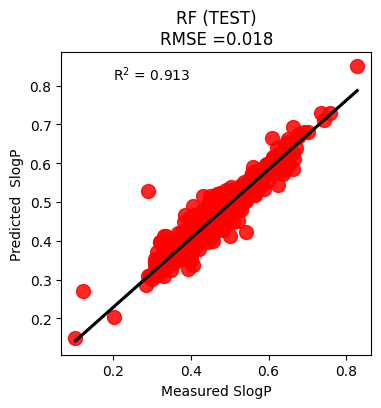

In [ ]:
plt.figure(figsize=(4,4))
ax = sns.regplot(x="SlogP", y="yRF", data=test, ci=0.95,
                      line_kws={'color':'black'},
                      scatter_kws={'alpha':0.85, 'color':'red', 's':100},
                      #label='WI'+' = '+fmt(aux['WI']),
                      label='R$^2$'+' = '+str('%1.3f' %r2_score(yt, y_pred_val_rf))
                      #label='R$^2$'+' = '+fmt(aux['R$^2$']),
                      )
ax.set_title('RF (TEST)'+ '\n'+'RMSE =' +str('%1.3f' % he.rmse(yt.values, y_pred_val_rf)))
ax.set_xlabel('Measured SlogP')
ax.set_ylabel('Predicted  SlogP')
#ax.set_yticklabels(labels= '%1.f' %ax.get_yticks(), rotation=0)
#ax.set_xticklabels(labels='%1.f' %ax.get_xticks(), rotation=0)
ax.set_aspect(1)
ax.legend(frameon=False, markerscale=0, loc=0)

In [ ]:
y_pred_val

array([4.50576257, 2.66867208, 1.39418236, ..., 5.13679213, 1.2648426 ,
       2.89611736])

In [ ]:
r2_score(yt, y_pred_val_rf)

0.9132068084850937

In [ ]:
mean_absolute_error(yt, y_pred_val_rf)

0.01120177251993519

In [ ]:
mean_squared_error(yt, y_pred_val_rf)

0.00033309284050359576

In [ ]:
!pip install hydroeval

In [ ]:
import hydroeval as he

In [ ]:
he.rmse(yt.values, y_pred_val_rf)

0.018250831227744006

In [ ]:
elm = ELMRegressor(n_neurons=200,ufunc='relu')

In [ ]:
elm.fit(X,y)

ELMRegressor(n_neurons=200, ufunc='relu')

In [ ]:
y_pred_val_elm = elm.predict(Xt)

In [ ]:
test['yELM'] =y_pred_val_elm

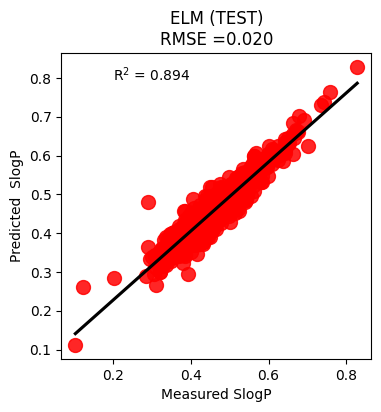

In [ ]:
plt.figure(figsize=(4,4))
ax = sns.regplot(x="SlogP", y="yELM", data=test, ci=0.95,
                      line_kws={'color':'black'},
                      scatter_kws={'alpha':0.85, 'color':'red', 's':100},
                      #label='WI'+' = '+fmt(aux['WI']),
                      label='R$^2$'+' = '+str('%1.3f' %r2_score(yt, y_pred_val_elm)),
                      #label='R$^2$'+' = '+fmt(aux['R$^2$']),
                      )
ax.set_title('ELM (TEST)'+ '\n'+'RMSE =' +str('%1.3f' % he.rmse(yt.values, y_pred_val_elm)))
ax.set_xlabel('Measured SlogP')
ax.set_ylabel('Predicted  SlogP')
#ax.set_yticklabels(labels=ax.get_yticks(), rotation=0)
#ax.set_xticklabels(labels=ax.get_xticks(), rotation=0)
ax.set_aspect(1)
ax.legend(frameon=False, markerscale=0, loc=0)

In [ ]:
r2_score(yt, y_pred_val_elm)

0.8937239462549245

In [ ]:
mean_absolute_error(yt, y_pred_val_elm)

0.014419054731935508

In [ ]:
mean_squared_error(yt, y_pred_val_elm)

0.0004078637045324033

In [ ]:
he.rmse(yt.values, y_pred_val_elm)

0.020195635779355976

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred_val_knn=knn.predict(Xt)

In [ ]:
test['yKNN'] =y_pred_val_knn

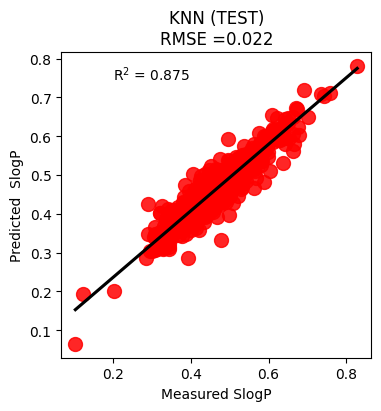

In [ ]:
plt.figure(figsize=(4,4))
ax = sns.regplot(x="SlogP", y="yKNN", data=test, ci=0.95,
                      line_kws={'color':'black'},
                      scatter_kws={'alpha':0.85, 'color':'red', 's':100},
                      #label='WI'+' = '+fmt(aux['WI']),
                      label='R$^2$'+' = '+str('%1.3f' %r2_score(yt, y_pred_val_knn)),
                      #label='R$^2$'+' = '+fmt(aux['R$^2$']),
                      )
ax.set_title('KNN (TEST)'+ '\n'+'RMSE =' +str('%1.3f' % he.rmse(yt.values, y_pred_val_knn)))
ax.set_xlabel('Measured SlogP')
ax.set_ylabel('Predicted  SlogP')
#ax.set_yticklabels(labels=ax.get_yticks(), rotation=0)
#ax.set_xticklabels(labels=ax.get_xticks(), rotation=0)
ax.set_aspect(1)
ax.legend(frameon=False, markerscale=0, loc=0)

In [ ]:
r2_score(yt, y_pred_val_knn)

0.8752064874787844

In [ ]:
mean_absolute_error(yt, y_pred_val_knn)

0.014437831960100804

In [ ]:
mean_squared_error(yt, y_pred_val_knn)

0.00047892956620881617

In [ ]:
he.rmse(yt.values, y_pred_val_knn)

0.021884459468052123

In [ ]:
svr = SVR(C=100,gamma= 0.0001)

In [ ]:
svr.fit(X,y)

SVR(C=100, gamma=0.0001)

In [ ]:
y_pred_val_svr=svr.predict(Xt)

In [ ]:
test['ySVR'] =y_pred_val_svr

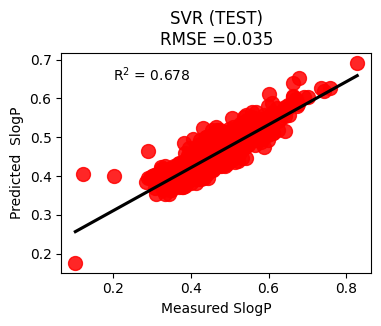

In [ ]:
plt.figure(figsize=(4,4))
ax = sns.regplot(x="SlogP", y="ySVR", data=test, ci=0.95,
                      line_kws={'color':'black'},
                      scatter_kws={'alpha':0.85, 'color':'red', 's':100},
                      #label='WI'+' = '+fmt(aux['WI']),
                      label='R$^2$'+' = '+str('%1.3f' %r2_score(yt, y_pred_val_svr)),
                      #label='R$^2$'+' = '+fmt(aux['R$^2$']),
                      )
ax.set_title('SVR (TEST)'+ '\n'+'RMSE =' +str('%1.3f' % he.rmse(yt.values, y_pred_val_svr)))
ax.set_xlabel('Measured SlogP')
ax.set_ylabel('Predicted  SlogP')
#ax.set_yticklabels(labels=ax.get_yticks(), rotation=0)
#ax.set_xticklabels(labels=ax.get_xticks(), rotation=0)
ax.set_aspect(1)
ax.legend(frameon=False, markerscale=0, loc=0)

In [ ]:
r2_score(yt, y_pred_val_svr)

0.6781370520355688

In [ ]:
mean_absolute_error(yt, y_pred_val_svr)

0.026377636384108036

In [ ]:
mean_squared_error(yt, y_pred_val_svr)

0.0012352379457312693

In [ ]:
he.rmse(yt.values, y_pred_val_svr)

0.035145952053277335

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'SlogP')

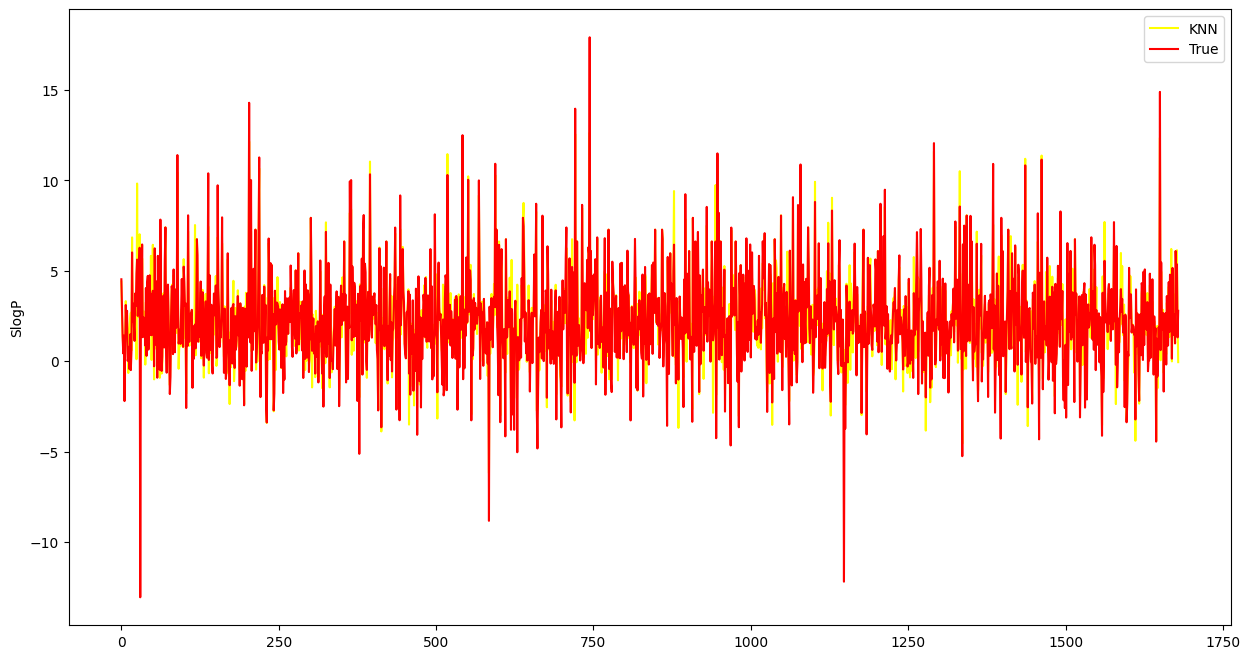

In [ ]:
plt.figure(figsize=(15,8))
#plt.plot(range(0,1680),y_pred_val_svr,color='black',label='SVR')
#plt.plot(range(0,1680),y_pred_val_elm,color='blue',label='ELM')
#plt.plot(range(0,1680),y_pred_val,color='green',label='RF')
plt.plot(range(0,1680),y_pred_val_knn,color='yellow',label='KNN')
plt.plot(range(0,1680),yt.values,color='red',label='True')
plt.legend()

plt.ylabel('SlogP')